In [36]:
import pandas as pd 
data = pd.read_csv('../data/BrentOilPrices.csv')
framed_data = pd.DataFrame(data)
print(framed_data.tail())

              Date  Price
9006  Nov 08, 2022  96.85
9007  Nov 09, 2022  93.05
9008  Nov 10, 2022  94.25
9009  Nov 11, 2022  96.37
9010  Nov 14, 2022  93.59


In [37]:
print(framed_data.isnull().sum())

Date     0
Price    0
dtype: int64


In [38]:
print(framed_data.duplicated().sum())

0


In [39]:
print(framed_data['Price'].dtype)

float64


In [40]:
framed_data['Date'] = pd.to_datetime(framed_data['Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_7652\1053921511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  framed_data['Date'] = pd.to_datetime(framed_data['Date'])


In [41]:
print(framed_data.head())

        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [42]:
import pandas as pd
from datetime import datetime

# Assuming framed_data is already loaded
# Convert the 'Date' column to datetime format
framed_data['Date'] = pd.to_datetime(framed_data['Date'], format='%m/%d/%Y')  # adjust format as needed

# Set 'Date' as the index for time series analysis
framed_data.set_index('Date', inplace=True)

# Check for missing values
framed_data['Price'].fillna(method='ffill', inplace=True)  # forward-fill any missing values


C:\Users\User\AppData\Local\Temp\ipykernel_7652\1599643541.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  framed_data['Price'].fillna(method='ffill', inplace=True)  # forward-fill any missing values
C:\Users\User\AppData\Local\Temp\ipykernel_7652\1599643541.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  framed_data['Price'].fillna(method='ffill', inplace=True)  # forward-fill any missing values


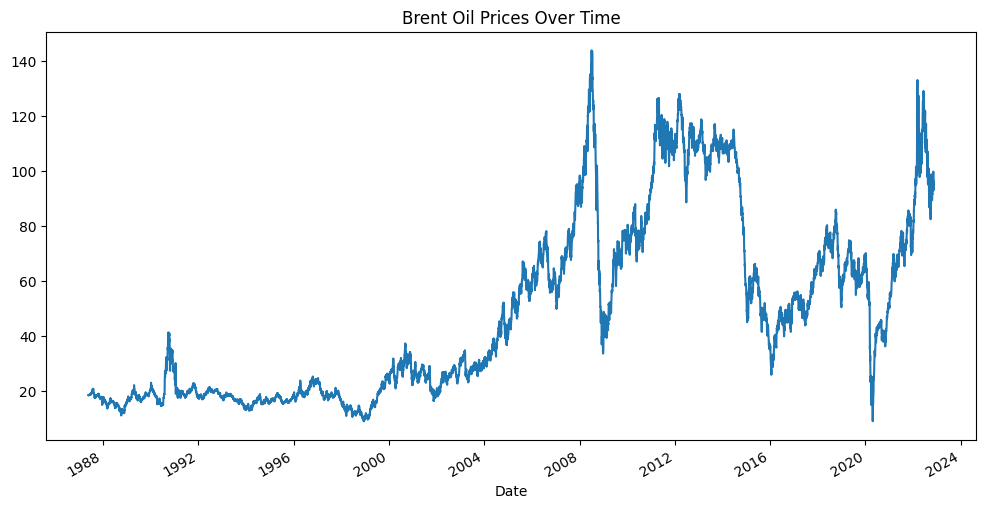

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

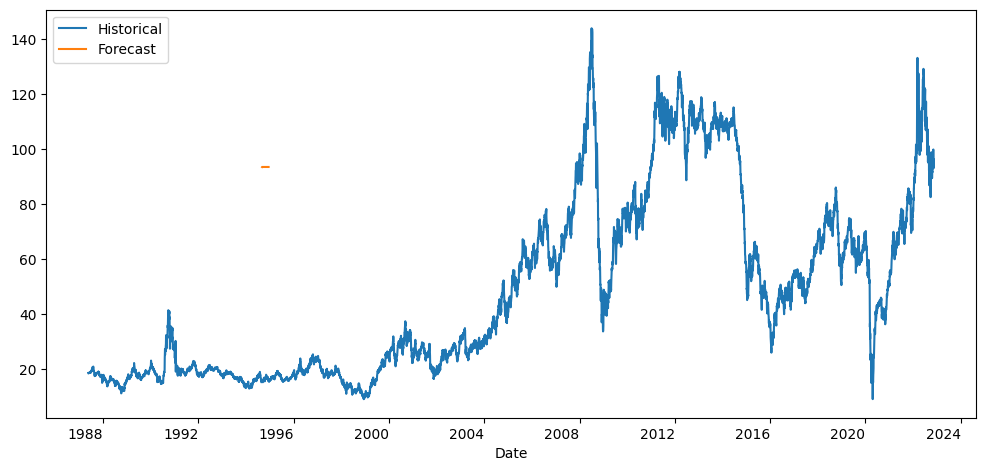

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Plot the time series to visualize trends
framed_data['Price'].plot(figsize=(12, 6), title='Brent Oil Prices Over Time')
plt.show()

# Fit an ARIMA model
model = ARIMA(framed_data['Price'], order=(1, 1, 1))  # adjust order based on further analysis
arima_result = model.fit()

# Plot the forecast
framed_data['Price'].plot(label='Historical', figsize=(12, 6))
arima_result.predict(start=len(framed_data), end=len(framed_data) + 100, typ='levels').plot(label='Forecast')
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming `framed_data` only has 'Date' and 'Price' columns
# Adding dummy 'GDP' and 'Inflation' columns for demonstration purposes
np.random.seed(0)
framed_data['GDP'] = np.random.normal(100, 10, len(framed_data))  # Generating random GDP data
framed_data['Inflation'] = np.random.normal(2, 0.5, len(framed_data))  # Generating random Inflation data

# Creating multivariate dataset
multi_var_data = framed_data[['Price', 'GDP', 'Inflation']].dropna()

# Fit VAR model on the generated data
var_model = VAR(multi_var_data)
var_result = var_model.fit(4)  # Using lag order 4 as an example

# Forecasting
forecast = var_result.forecast(multi_var_data.values[-4:], steps=10)
forecast_df = pd.DataFrame(forecast, columns=multi_var_data.columns)

print(forecast_df)


       Price         GDP  Inflation
0  93.475163   99.888079   2.027685
1  93.470880  100.449634   2.020890
2  93.475475  100.174255   1.992056
3  93.469413  100.127654   1.983354
4  93.449996  100.003616   2.014027
5  93.431571   99.988625   2.014847
6  93.411936   99.991669   2.016414
7  93.392103  100.000069   2.016318
8  93.372493  100.007581   2.015084
9  93.352882  100.008261   2.015016


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Mon, 04 Nov 2024   AIC                          70575.934
Time:                        21:55:52   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

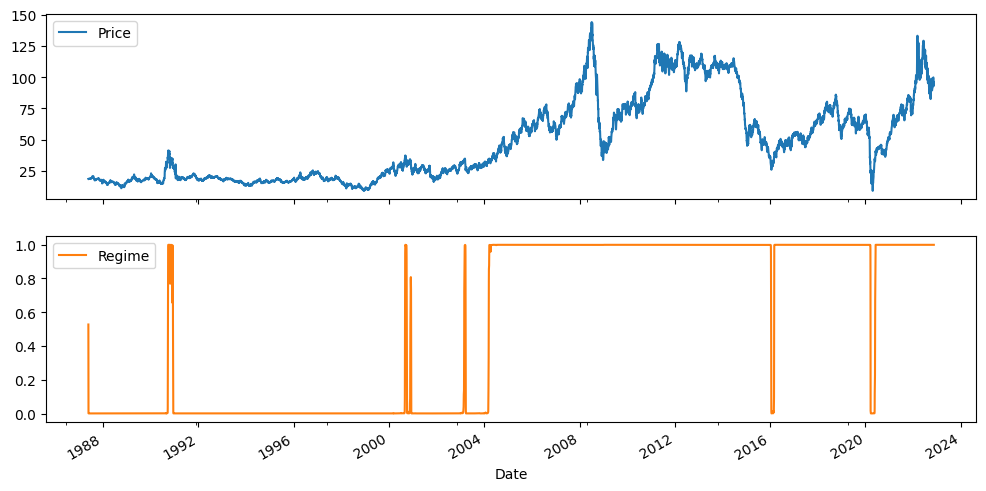

In [13]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit Markov-switching model with two regimes
markov_model = MarkovRegression(framed_data['Price'], k_regimes=2, trend='c', switching_variance=True)
markov_result = markov_model.fit()

# Print summary and plot regimes
print(markov_result.summary())
framed_data['Regime'] = markov_result.predicted_marginal_probabilities[1]
framed_data[['Price', 'Regime']].plot(subplots=True, figsize=(12, 6))
plt.show()


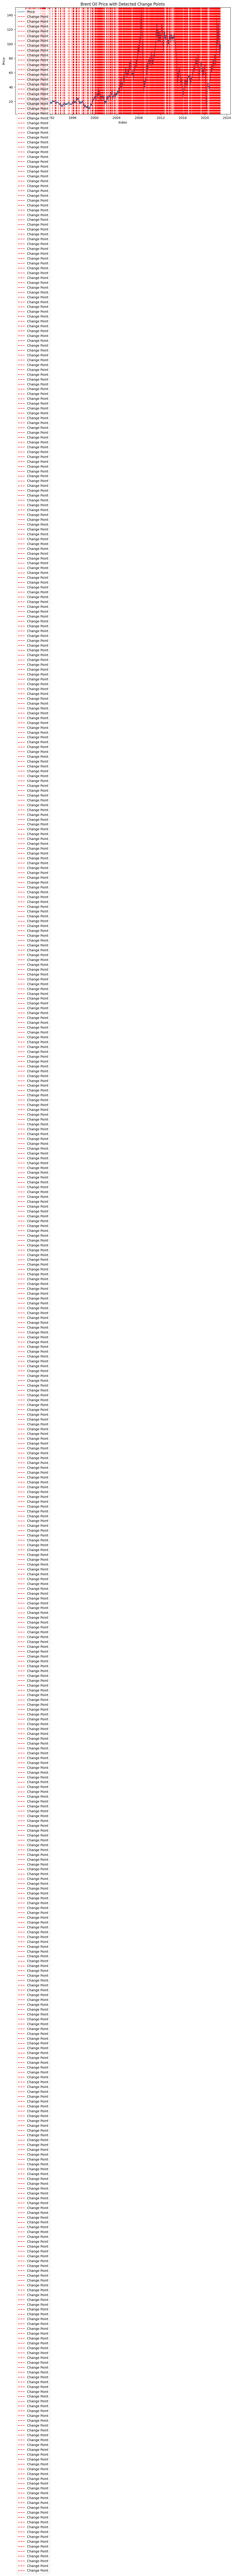

In [37]:
from ruptures import Pelt
from ruptures.costs import CostL2
import matplotlib.pyplot as plt

# Convert price data to numpy array
price_data = framed_data['Price'].values

# Apply PELT for change point detection with a higher penalty
pelt = Pelt(model="l2").fit(price_data)
change_points = pelt.predict(pen=15)  # Increase pen value if still detecting too many change points

# Filter change points to ensure they are within valid index range
change_points = [cp for cp in change_points if cp < len(framed_data)]

# Plot change points
plt.figure(figsize=(12, 6))
plt.plot(framed_data['Price'], label='Price')
for cp in change_points:
    plt.axvline(framed_data.index[cp], color='red', linestyle='--', label='Change Point')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Brent Oil Price with Detected Change Points')
plt.show()


In [38]:
# Compute correlations
print(framed_data.corr())


                   Price       GDP  Inflation    Regime  Predicted_LSTM
Price           1.000000  0.013390   0.016925  0.816778        0.998158
GDP             0.013390  1.000000  -0.012005  0.008266        0.014501
Inflation       0.016925 -0.012005   1.000000  0.021813        0.014491
Regime          0.816778  0.008266   0.021813  1.000000        0.817115
Predicted_LSTM  0.998158  0.014501   0.014491  0.817115        1.000000


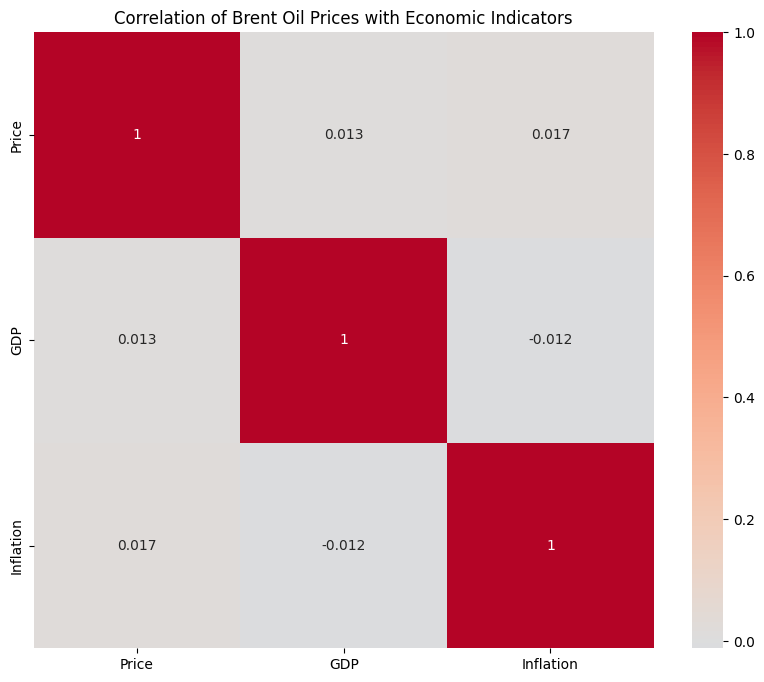

In [15]:
# Columns that we want to include in the analysis, if available
desired_columns = ['Price', 'GDP', 'Inflation', 'Unemployment', 'Exchange_Rate']

# Only select columns that are present in framed_data
available_columns = [col for col in desired_columns if col in framed_data.columns]
economic_factors = framed_data[available_columns].dropna()

# Check if we have at least two columns for correlation analysis
if len(available_columns) > 1:
    correlation_matrix = economic_factors.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation of Brent Oil Prices with Economic Indicators')
    plt.show()
else:
    print("Not enough data for correlation analysis.")


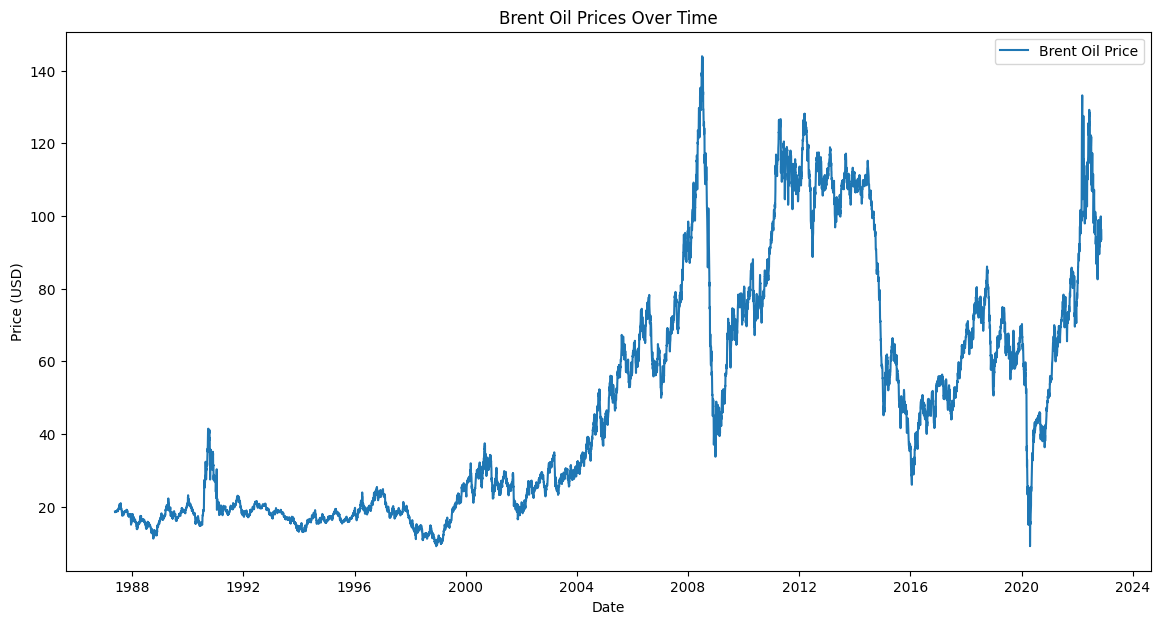

In [45]:
import matplotlib.pyplot as plt

# Plot the price trend over time
plt.figure(figsize=(14, 7))
plt.plot(framed_data['Price'], label='Brent Oil Price')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


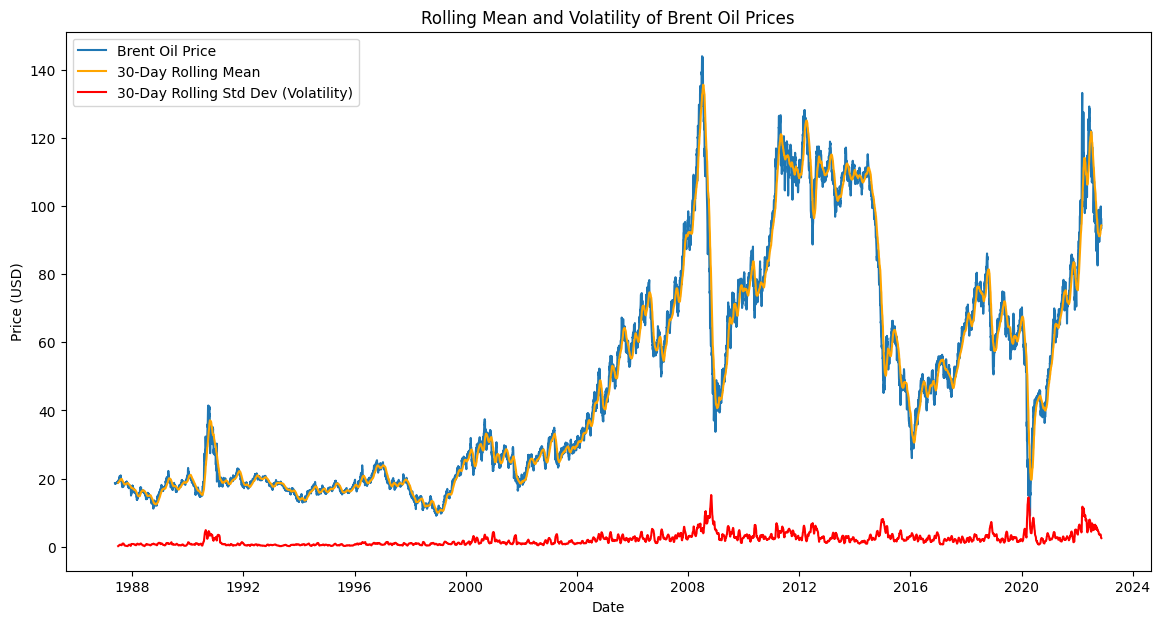

In [46]:
# Calculate rolling mean and volatility (standard deviation)
framed_data['Rolling_Mean'] = framed_data['Price'].rolling(window=30).mean()
framed_data['Rolling_Std'] = framed_data['Price'].rolling(window=30).std()

# Plot the rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(framed_data['Price'], label='Brent Oil Price')
plt.plot(framed_data['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(framed_data['Rolling_Std'], label='30-Day Rolling Std Dev (Volatility)', color='red')
plt.title("Rolling Mean and Volatility of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


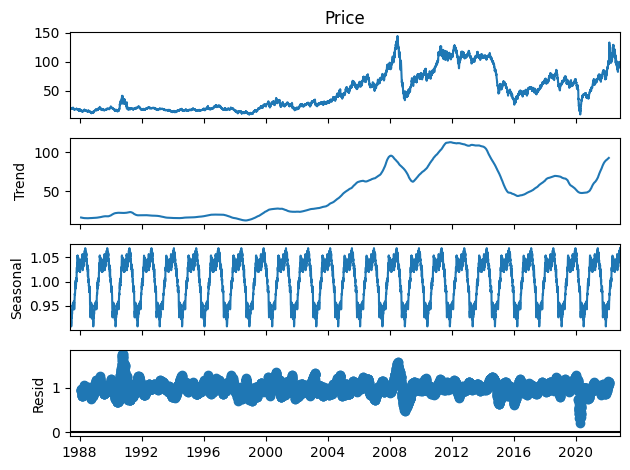

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(framed_data['Price'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


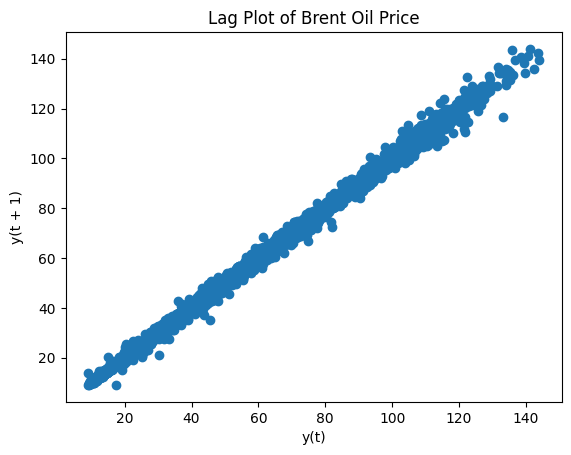

In [49]:
from pandas.plotting import lag_plot

lag_plot(framed_data['Price'])
plt.title("Lag Plot of Brent Oil Price")
plt.show()


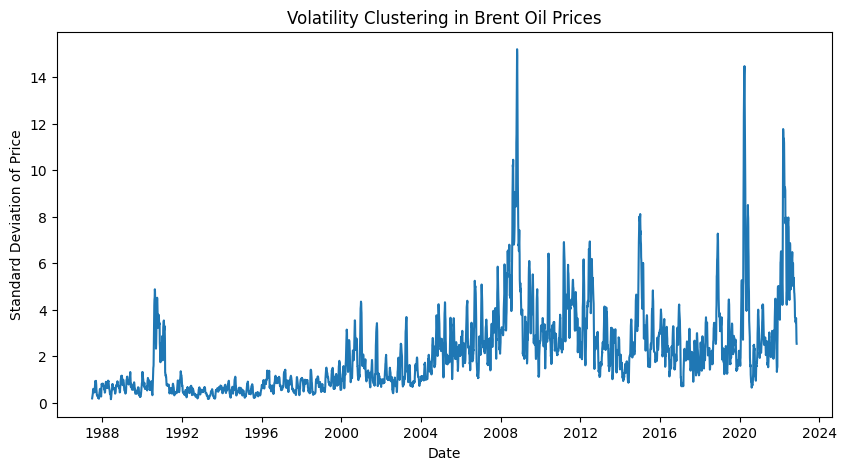

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(framed_data['Rolling_Std'])
plt.title("Volatility Clustering in Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Price")
plt.show()


In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (for example, ARIMA(5,1,1))
arima_model = ARIMA(framed_data['Price'], order=(5,1,1))
arima_result = arima_model.fit()


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
from arch import arch_model

# Fit GARCH model (e.g., GARCH(1,1))
garch_model = arch_model(framed_data['Price'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 97378349170.75809
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70149.2813040292
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1340737720.4058893
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44060.65565021634
Iteration:      5,   Func. Count:     33,   Neg. LLF: 42266.911898049744
Iteration:      6,   Func. Count:     39,   Neg. LLF: 43360.16166979114
Iteration:      7,   Func. Count:     45,   Neg. LLF: 42298.74559053366
Iteration:      8,   Func. Count:     51,   Neg. LLF: 42699.135720583865
Iteration:      9,   Func. Count:     57,   Neg. LLF: 38587.52186607195
Iteration:     10,   Func. Count:     63,   Neg. LLF: 38912.80790742469
Iteration:     11,   Func. Count:     69,   Neg. LLF: 36029.92300689227
Iteration:     12,   Func. Count:     74,   Neg. LLF: 37367.883989630194
Iteration:     13,   Func. Count:     84,   Neg. LLF: 41624.71066899116
Iteration:     14,   Func. Count:     91,   Neg. LLF: 35258.4

In [56]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit Markov switching model
markov_model = MarkovRegression(framed_data['Price'], k_regimes=2, trend='c', switching_variance=True)
markov_result = markov_model.fit()


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/10


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0177
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 4.8223e-04
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 4.1071e-04
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 3.5785e-04
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 3.2722e-04
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 2.9851e-04
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2.6248e-04
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.5514e-04
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.5220e-04
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 2.2816e-04
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_7652\3359724532.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  framed_data['Predicted_LSTM'].iloc[60:] = predicted_prices.flatten()


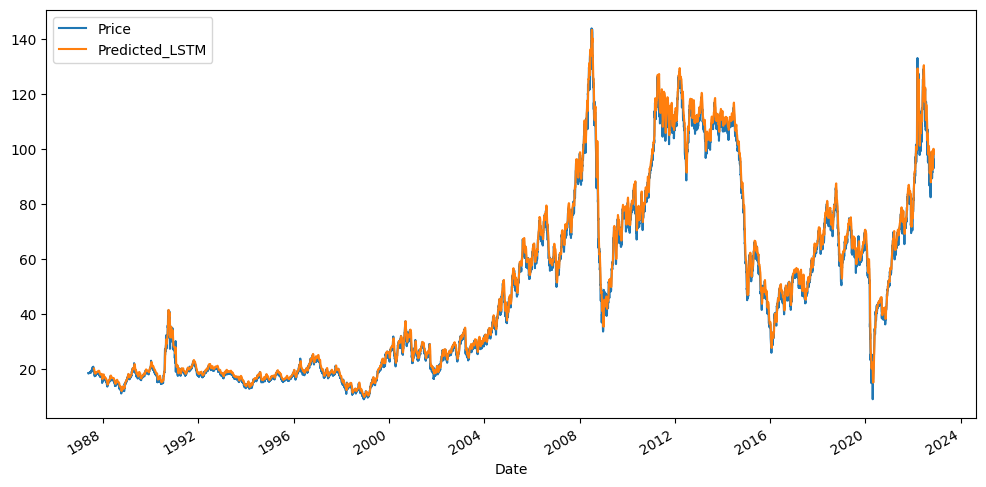

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the price data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(framed_data['Price'].values.reshape(-1, 1))

# Prepare data for LSTM
X, y = [], []
for i in range(60, len(scaled_data)):  # Using past 60 days for prediction
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=64, epochs=10)

# Make predictions and plot
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
framed_data['Predicted_LSTM'] = np.nan
framed_data['Predicted_LSTM'].iloc[60:] = predicted_prices.flatten()

framed_data[['Price', 'Predicted_LSTM']].plot(figsize=(12, 6))
plt.show()


In [63]:
# Define the size of the test set
train_size = int(len(framed_data) * 0.8)

# Split into training and testing sets
train, test = framed_data.iloc[:train_size], framed_data.iloc[train_size:]

# Define target variables for train and test
y_train = train['Price']
y_test = test['Price']


In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 1))  # Adjust order as necessary
arima_result = arima_model.fit()


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
# Forecast the same number of steps as the test set
y_pred_arima = arima_result.forecast(steps=len(y_test))


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate the ARIMA model
rmse, mae, r2 = evaluate_model(y_test, y_pred_arima)
print(f"RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")


RMSE: 24.863821281351946, MAE: 18.50874655600554, R-squared: -0.45200683687323795
